In [1]:
%matplotlib inline
import json
from matplotlib import pyplot as plt
from fileoperations.fileoperations import get_filenames_in_dir
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

## Plot tonic distance distribution
Below, we compute the distribution of the octave-wrapped cent distance between the estimated and the annotated tonic for each test and for all the parameter sets with 7.5 cent bin size. As can be seen from the plot, the main confusion occurs around the fourth, fifth and seventh of the tonic, which typically act as the melodic centers and/or anchor points in the melodic progression.

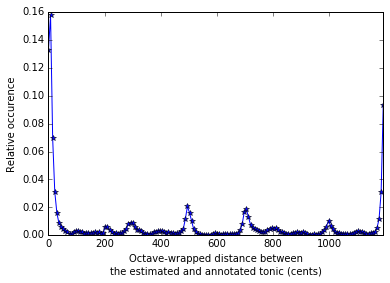

In [2]:
tonic_files = get_filenames_in_dir('data/testing/tonic', keyword='*overall_eval.json')[0]

vals = []
for tonic_file in tonic_files:
    if str.split(str.split(tonic_file, '/')[3], '--')[2] == '7_5':
        tonic_res = json.load(open(tonic_file))
        if any(vals):
            vals = np.asarray(tonic_res['tonic_deviation_distribution']['vals']) + vals
        else:
            vals = np.asarray(tonic_res['tonic_deviation_distribution']['vals'])
        
bins = tonic_res['tonic_deviation_distribution']['bins']

plt.plot(bins, vals/sum(vals), '*-')
plt.xlabel('Octave-wrapped distance between\nthe estimated and annotated tonic (cents)')
plt.ylabel('Relative occurence')
plt.xlim([0, 1200-7.5])
plt.savefig('karakurt2016modetonic_dlfm/figures/tonic_deviation_distribution.svg')
plt.show()


## Confusion matrix of the best performing mode recognition experiment
Below, we display the confusions in the mode recognition task for the best performing parameter set. We observe that the confusions are mainly between makams, which either have very similar intervals in their scale or contain similar sets of pitches (e.g. between _Hüzzam_ and _Segah_ makams). 

These makams are typically distinguished from each other by the melodic progressions. Pitch distribution based methods are expected to have problems with similar modes as these features don't consider the temporal characteristics of the music.

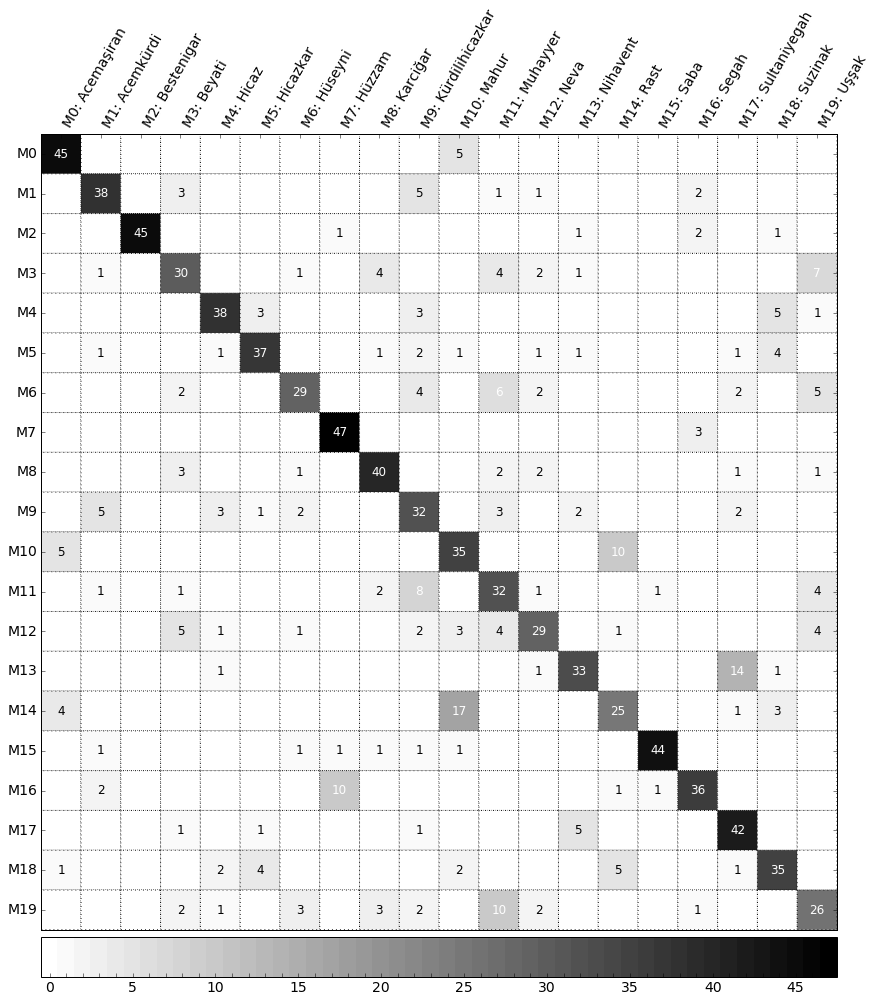

In [20]:
mode_file = 'data/testing/mode/multi--pcd--25_0--25_0--bhat--10--0_15/overall_eval.json'
mode_res = json.load(open(mode_file))

conf_arr = np.asarray(mode_res['confusion_matrix']['matrix'])

width = len(conf_arr)
height = len(conf_arr[0])

label_dict = {u'Acemasiran': u'Acemaşiran',
              u'Acemkurdi': u'Acemkürdi',
              u'Bestenigar': u'Bestenigar',
              u'Beyati': u'Beyati',
              u'Hicaz': u'Hicaz',
              u'Hicazkar': u'Hicazkar',
              u'Huseyni': u'Hüseyni',
              u'Huzzam': u'Hüzzam',
              u'Karcigar': u'Karciğar',
              u'Kurdilihicazkar': u'Kürdilihicazkar',
              u'Mahur': u'Mahur',
              u'Muhayyer': u'Muhayyer',
              u'Neva': u'Neva',
              u'Nihavent': u'Nihavent',
              u'Rast': u'Rast',
              u'Saba': u'Saba',
              u'Segah': u'Segah',
              u'Sultaniyegah': u'Sultaniyegah',
              u'Suzinak': u'Suzinak',
              u'Ussak': u'Uşşak'}

x_labels = ['M'  + str(i) + ': ' + label_dict[l] 
            for (i, l) in enumerate(mode_res['confusion_matrix']['labels'])]
y_labels = ['M' + str(i) for i in range(len(x_labels))]

fig = plt.figure(figsize=(14,14))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
ax.grid(which='major')
cmap_local = plt.get_cmap('binary', np.max(conf_arr) - np.min(conf_arr)+1)
res = ax.pcolor(conf_arr, cmap=cmap_local, edgecolor='black', linestyle=':', lw=1)

ticks = np.arange(np.min(conf_arr),np.max(conf_arr)+2)
tickpos = np.linspace(ticks[0] , ticks[-2], len(ticks));

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
cb = fig.colorbar(res, cax=cax, orientation = 'horizontal', ticks=tickpos+0.5)

divider_labels = [str(ii) if ii%5==0 else '' for ii in np.arange(len(tickpos))]
cb.ax.set_xticklabels(divider_labels, fontsize = 14)

#Axes
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticks(np.arange(width)+0.5)
ax.set_xticklabels(x_labels, rotation=60, horizontalalignment='left', fontsize = 14)
#ax.xaxis.labelpad = 0.1
ax.set_yticks(np.arange(height)+0.5)
ax.set_yticklabels(y_labels , rotation='horizontal', fontsize = 14)

for x in xrange(conf_arr.shape[0]):
    for y in xrange(conf_arr.shape[1]):
        textcolor = 'black'
        if conf_arr[x,y] >= 6:
            textcolor = 'white'
        if conf_arr[x,y]==0:
            continue
        ax.annotate(int(conf_arr[x,y]), xy=(y+0.5, x+0.5),  horizontalalignment='center', 
                    verticalalignment='center', color=textcolor, fontsize=12)
plt.tight_layout()
plt.savefig('karakurt2016modetonic_dlfm/figures/confusion_matrix.svg')
plt.show()